# The Gist
**Skip this if you're already familiar with the ARG.**


---


As part of the recent SiIvaGunner ARG (later revealed to be named RE:SPH ARG!), 10 puzzles in a [Google Drive folder](), inspired by Harvard University's CS50x Puzzle Day (the "x" means online), were presented to ARG solvers.

Only 8/10 needed to be solved to progress.

After 3 days, all other problems have been practically solved except for Question 1. People have somehow guessed the answer to be "mat".  

Question 1 is the following:
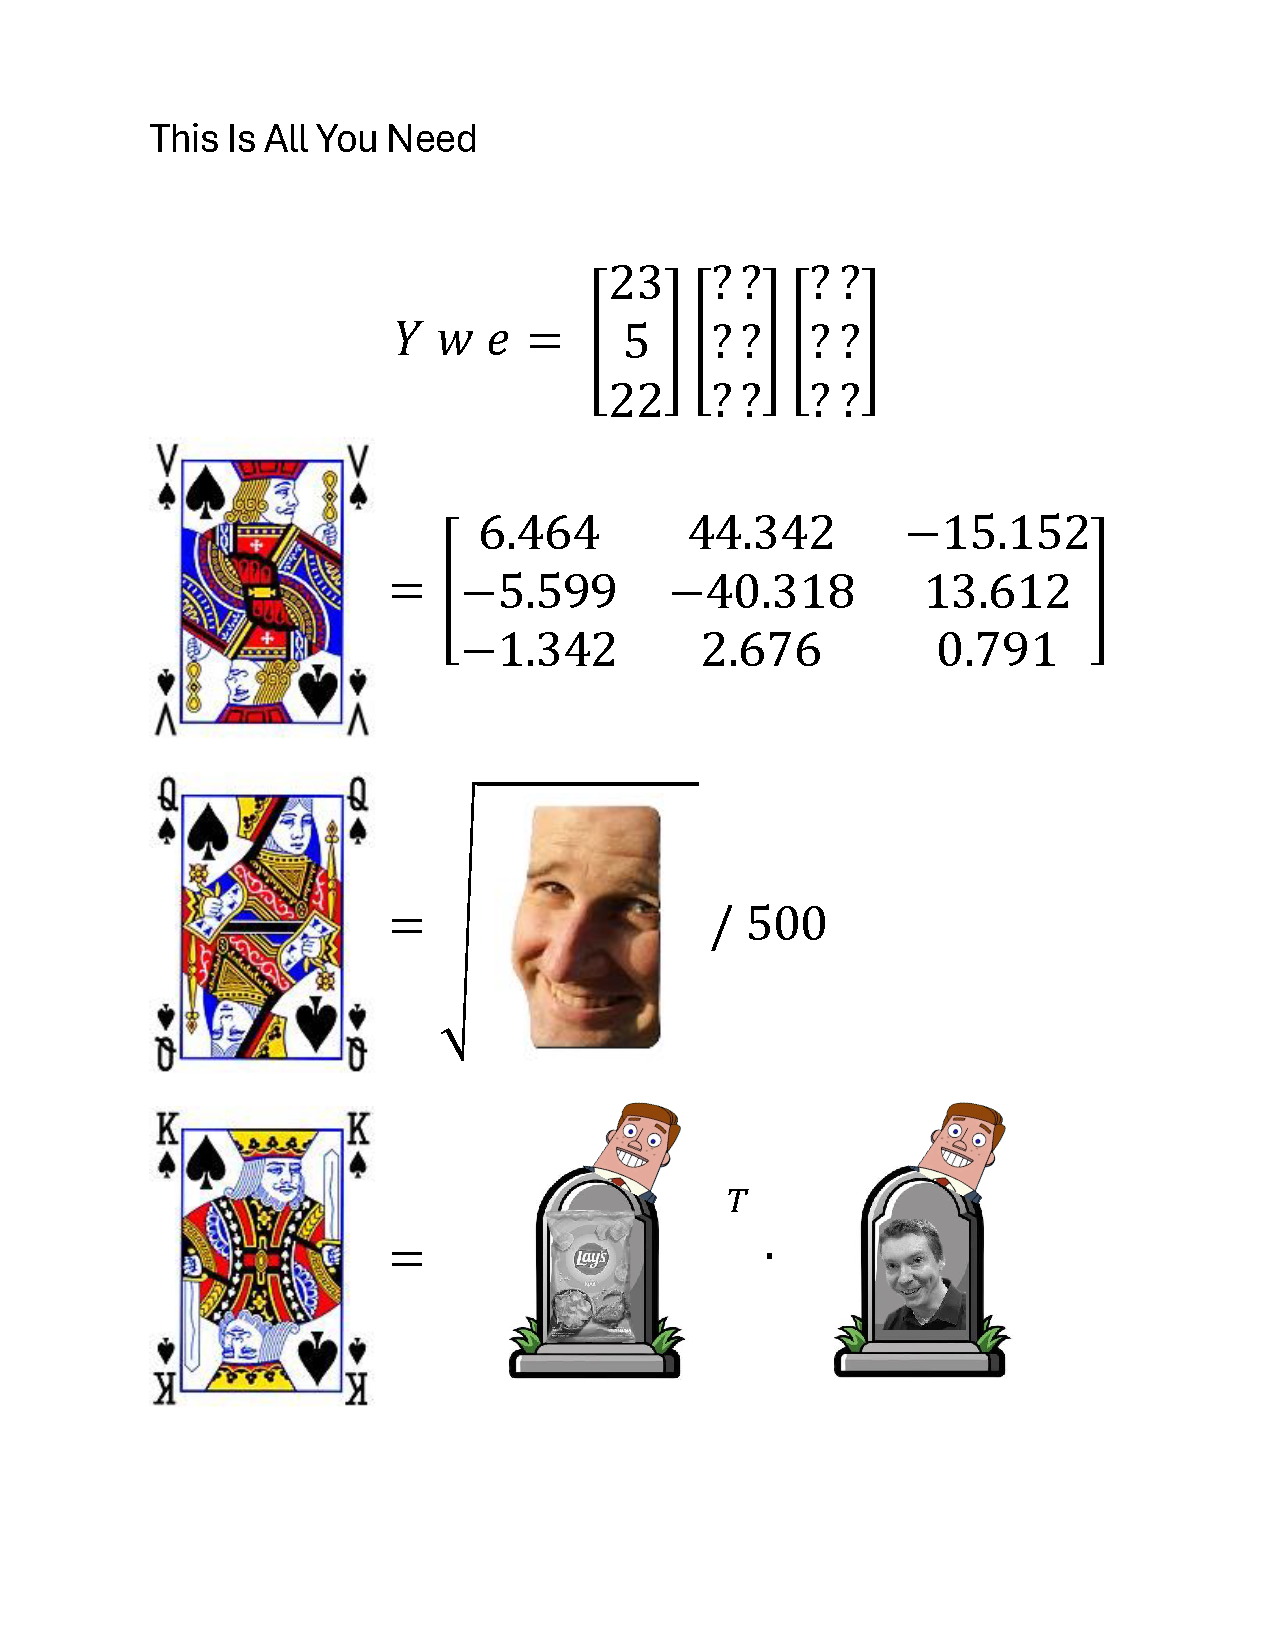




The title directly references the "Attention Is All You Need" paper by and the Attention mechanism.

People were quick to solve matrices Q and K.

However, it took a bit of time before people figured out the 3x3 matrix at the top, which corresponded to video dates.

When they did, it seemed like solving the puzzle was easy: use Ywe as an input matrix and use Q, K, and V as weights to calculate the Q, K, and V needed for the Attention function.

...People still didn't figure it out.

As it turns out, it seems that the way the solution calculated the attention is... (explained in the research paper).

# Solution (written by problem author)

```
Watch the following video to understand how to do the calculations: https://www.youtube.com/watch?v=eMlx5fFNoYc

Y = [[23]
 [ 5]
 [22]]: https://siivagunner.fandom.com/wiki/Y_-_Kero_Blaster
w = [[ 9]
 [ 8]
 [22]]: https://siivagunner.fandom.com/wiki/W_-_Deltarune
e = [[15]
 [ 1]
 [17]]: https://siivagunner.fandom.com/wiki/Main_Theme_-_e

Parker's Square (without ^2):
[[29  1 47]
 [41 37  1]
 [23 41 29]]
ref: https://en.wikipedia.org/wiki/Magic_square#Parker_square

Q =
[[0.058 0.002 0.094]
 [0.082 0.074 0.002]
 [0.046 0.082 0.058]]

K_lays = [[-6.9]
 [ 0. ]
 [ 9.8]]: https://siivagunner.fandom.com/wiki/Waterfall_(Short_Mix)_-_Undertale

K_grime = [[ 3.3]
 [-2.2]
 [ 0.9]]: https://siivagunner.fandom.com/wiki/Golden_Ratio_-_e

K = normalize(K_lays_transposed) dot product normalize(K_grime) =
[[-0.46713506  0.31142337 -0.12740047]
 [ 0.          0.          0.        ]
 [ 0.66346719 -0.44231146  0.1809456 ]]

====================================
Step 1: Calculate Q_x = Q dot product x
QY = [[3.412]
 [2.3  ]
 [2.744]]
Qw = [[2.606]
 [1.374]
 [2.346]]
Qe = [[2.47 ]
 [1.338]
 [1.758]]

====================================
Step 2: Calculate K_x = K dot product x
KY = [[-11.98979985]
 [  0.        ]
 [ 17.02899109]]
Kw = [[-4.5156389 ]
 [ 0.        ]
 [ 6.41351612]]
Ke = [[-8.86141051]
 [ 0.        ]
 [12.58577146]]

====================================
Step 3: Calculate QK_x = [Q_x^T . KY, Q_x^T . Kw, Q_x^T . Ke] / sqrt(3) 	 [this is the QK/sqrt(d) part, result in three 1x3 matrices]
QKY = [3.35922852 1.26516399 2.4827356 ]
QKw = [5.02560009 1.89275847 3.714316  ]
QKe = [0.18599957 0.07005179 0.1374684 ]

====================================
Step 4: Calculate sQK_x = softmax() 	 [softmax(QK/sqrt(d)), see https://en.wikipedia.org/wiki/Softmax_function]
sQKY = [0.64959295 0.08002038 0.27038666]
sQKw = [0.76157544 0.03319993 0.20522463]
sQKe = [0.35172264 0.31321665 0.33506071]

V =
[[  6.464  44.342 -15.152]
 [ -5.599 -40.318  13.612]
 [ -1.342   2.676   0.791]]

====================================
Step 5: Calculate Varr = [VY, Vw, Ve] where V_x = V . x, three 3x1 vectors result in a 3x3 matrix
Varr =
[[ 3.70380e+01  7.95680e+01 -1.16282e+02]
 [-3.09030e+01 -7.34710e+01  1.07101e+02]
 [-8.40000e-02  2.67320e+01 -4.00700e+00]]

====================================
Step 6: Calculate new_x = x + sQK_x . Varr (e.g. new_Y = Y + sQKY[0] . VY + sQKY[1] . Vw + sQKY[2] . Ve)
new_Y = [[21.98558375]
 [ 8.00513334]
 [23.00109975]]
new_w = [[15.98495201]
 [ 4.00556591]
 [22.00119296]]
new_e = [[13.98759627]
 [ 3.00371168]
 [24.00077455]]

Rounding:
22-8-23 -> https://siivagunner.fandom.com/wiki/M_-_Minecraft_Dungeons
16-4-22 -> https://siivagunner.fandom.com/wiki/Boing_Boing_Boing_-_a
14-3-24 -> https://siivagunner.fandom.com/wiki/T_-_2

```




# Solution Implementation

This snippet exactly follows how the solution was attained as written in the author's solution write-up.

In [ ]:
import numpy as np

def softmax(x, axis=0):
    """Compute softmax values for each sets of scores in x."""
    return np.exp(x) / np.sum(np.exp(x), axis=axis)

sqrt_parker_square = np.matrix(
      [[29, 1, 47],
       [41, 37, 1],
       [23, 41, 29]])

Q = sqrt_parker_square / 500
print("W_Q:")
print(Q)

V = np.matrix(
      [[  6.464,  44.342, -15.152],
       [ -5.599, -40.318,  13.612],
       [ -1.342,   2.676,   0.791]])
print("W_V:")
print(V)

omega_lays_death = np.matrix([-6.9, 0, 9.8])
numberphile_death = np.matrix([3.3, -2.2, 0.9])

omega_lays_death_norm = omega_lays_death / np.linalg.norm(omega_lays_death)
numberphile_death_norm = numberphile_death / np.linalg.norm(numberphile_death)

K = np.matmul(omega_lays_death_norm.transpose(), numberphile_death_norm)

print("W_K:")
print(K)

d_k = 3

ywe = np.matrix([
    # Y   w   e
    [23,  9,  15],
    [5,   8,  1],
    [22, 22,  17]
])
print("Ywe:")
print(ywe)

# Why right multiply Ywe by the input matrix instead of left multiply?
# Note that other NumPy implementations have always left multiplied by the
# input matrix (i.e. right-multiplied by Q, K, and V).

# We would later find out that this is a result of the initial matrix
# transpositions.
true_Q = np.matmul(Q, ywe)
true_K = np.matmul(K, ywe)
true_V = np.matmul(V, ywe)

print("CALCULATED K:")
print(true_K)

print("CALCULATED Q:")
print(true_Q)

print("CALCULATED V:")
print(true_V)

# This is K^T * Q, not Q * K^T.
scores = np.matmul(true_K.transpose(), true_Q) / np.sqrt(d_k)
print("Q * K^T / sqrt(d):")
print(scores)

# axis = 0 means that the softmax applies over each column
softmax = softmax(scores, 0)
print("SOFTMAX:")

print(softmax)

# This is not a right multiplication with V like the original paper.
att = np.matmul(true_V, softmax)

print("ATTENTION MATRIX:")
print(att)


print("GOAL:")
goal = np.matrix([
    # m   a   t
    [22, 16, 14],
    [8,  4,  3],
    [23, 22, 24]
])
print(goal)

print("SOLUTION:")
print(ywe + att)

print("SOLUTION (ROUNDED):")
print(np.round(ywe + att))

# This is the right solution despite the (apparent) errors above.

W_Q:
[[0.058 0.002 0.094]
 [0.082 0.074 0.002]
 [0.046 0.082 0.058]]
W_V:
[[  6.464  44.342 -15.152]
 [ -5.599 -40.318  13.612]
 [ -1.342   2.676   0.791]]
W_K:
[[-0.46713506  0.31142337 -0.12740047]
 [ 0.          0.          0.        ]
 [ 0.66346719 -0.44231146  0.1809456 ]]
Ywe:
[[23  9 15]
 [ 5  8  1]
 [22 22 17]]
CALCULATED K:
[[-11.98979985  -4.5156389   -8.86141051]
 [  0.           0.           0.        ]
 [ 17.02899109   6.41351612  12.58577146]]
CALCULATED Q:
[[3.412 2.606 2.47 ]
 [2.3   1.374 1.338]
 [2.744 2.346 1.758]]
CALCULATED V:
[[ 3.70380e+01  7.95680e+01 -1.16282e+02]
 [-3.09030e+01 -7.34710e+01  1.07101e+02]
 [-8.40000e-02  2.67320e+01 -4.00700e+00]]
Q * K^T / sqrt(d):
[[3.35922852 5.02560009 0.18599957]
 [1.26516399 1.89275847 0.07005179]
 [2.4827356  3.714316   0.1374684 ]]
SOFTMAX:
[[0.64959295 0.76157544 0.35172264]
 [0.08002038 0.03319993 0.31321665]
 [0.27038666 0.20522463 0.33506071]]
ATTENTION MATRIX:
[[-1.01441625e+00  6.98495201e+00 -1.01240373e+00]
 [ 3

# Paper Implementation
This snippet follows the original "Attention Is All You Need" paper and references other NumPy implementations of the attention mechanism.

Without first transposing the matrices from column to row vectors, we don't get anything close to the intended solution.

In [ ]:
import numpy as np

def softmax(x, axis=0):
    """Compute softmax values for each sets of scores in x."""
    return np.exp(x) / np.sum(np.exp(x), axis=axis)

sqrt_parker_square = np.matrix(
      [[29, 1, 47],
       [41, 37, 1],
       [23, 41, 29]])

Q = sqrt_parker_square / 500
print("W_Q:")
print(Q)

V = np.matrix(
      [[  6.464,  44.342, -15.152],
       [ -5.599, -40.318,  13.612],
       [ -1.342,   2.676,   0.791]])
print("W_V:")
print(V)

omega_lays_death = np.matrix([-6.9, 0, 9.8])
numberphile_death = np.matrix([3.3, -2.2, 0.9])

omega_lays_death_norm = omega_lays_death / np.linalg.norm(omega_lays_death)
numberphile_death_norm = numberphile_death / np.linalg.norm(numberphile_death)

K = np.matmul(omega_lays_death_norm.transpose(), numberphile_death_norm)

print("W_K:")
print(K)

d_k = 3

ywe = np.matrix([
    # Y   w   e
    [23,  9,  15],
    [5,   8,  1],
    [22, 22,  17]
])
print("Ywe:")
print(ywe)

true_Q = np.matmul(ywe, Q)
true_K = np.matmul(ywe, K)
true_V = np.matmul(ywe, V)

print("CALCULATED K:")
print(true_K)

print("CALCULATED Q:")
print(true_Q)

print("CALCULATED V:")
print(true_V)

scores = np.matmul(true_Q, true_K.transpose()) / np.sqrt(d_k)
print("Q * K^T / sqrt(d):")
print(scores)

# axis = 1 means that the softmax applies over each row
softmax = softmax(scores, 1)
print("SOFTMAX:")

print(softmax)

att = np.matmul(softmax, true_V)

print("ATTENTION MATRIX:")
print(att)


print("GOAL:")
goal = np.matrix([
    # m   a   t
    [22, 16, 14],
    [8,  4,  3],
    [23, 22, 24]
])
print(goal)

print("SOLUTION:")
print(ywe + att)

print("SOLUTION (ROUNDED):")
print(np.round(ywe + att))


W_Q:
[[0.058 0.002 0.094]
 [0.082 0.074 0.002]
 [0.046 0.082 0.058]]
W_V:
[[  6.464  44.342 -15.152]
 [ -5.599 -40.318  13.612]
 [ -1.342   2.676   0.791]]
W_K:
[[-0.46713506  0.31142337 -0.12740047]
 [ 0.          0.          0.        ]
 [ 0.66346719 -0.44231146  0.1809456 ]]
Ywe:
[[23  9 15]
 [ 5  8  1]
 [22 22 17]]
CALCULATED K:
[[-0.79209858  0.52806572 -0.21602689]
 [-1.67220811  1.11480541 -0.45605676]
 [ 1.00197085 -0.66798057  0.27326478]]
CALCULATED Q:
[[2.762 1.942 3.05 ]
 [0.992 0.684 0.544]
 [3.862 3.066 3.098]]
CALCULATED V:
[[  78.151  697.144 -214.123]
 [ -13.814  -98.158   33.927]
 [  -3.784  134.02   -20.433]]
Q * K^T / sqrt(d):
[[-1.05144413 -2.21971538  1.33003189]
 [-0.31297203 -0.66071874  0.39589625]
 [-1.21779713 -2.57090506  1.54046133]]
SOFTMAX:
[[0.08242823 0.02562726 0.89194451]
 [0.267525   0.18894696 0.54352804]
 [0.05871719 0.01517463 0.92610818]]
ATTENTION MATRIX:
[[  2.7127152  174.48722564 -35.00542501]
 [ 16.24052296 240.80042216 -61.97876086]
 [  0.8

# (Transposed) Paper Implementation
This snippet follows the original "Attention Is All You Need" paper and references other NumPy implementations of the attention mechanism.

By transposing the column vectors to row vectors, we see that we now get the original, intended solution!

In [ ]:
import numpy as np

def softmax(x, axis=0):
    """Compute softmax values for each sets of scores in x."""
    return np.exp(x) / np.sum(np.exp(x), axis=axis)

sqrt_parker_square = np.matrix(
      [[29, 1, 47],
       [41, 37, 1],
       [23, 41, 29]])

Q = sqrt_parker_square / 500
print("W_Q:")
print(Q)

V = np.matrix(
      [[  6.464,  44.342, -15.152],
       [ -5.599, -40.318,  13.612],
       [ -1.342,   2.676,   0.791]])
print("W_V:")
print(V)

omega_lays_death = np.matrix([-6.9, 0, 9.8])
numberphile_death = np.matrix([3.3, -2.2, 0.9])

omega_lays_death_norm = omega_lays_death / np.linalg.norm(omega_lays_death)
numberphile_death_norm = numberphile_death / np.linalg.norm(numberphile_death)

K = np.matmul(omega_lays_death_norm.transpose(), numberphile_death_norm)

print("W_K:")
print(K)

d_k = 3

ywe = np.matrix([
    # Y   w   e
    [23,  9,  15],
    [5,   8,  1],
    [22, 22,  17]
])
print("Ywe:")
print(ywe)

ywe = ywe.transpose()

true_Q = np.matmul(ywe, Q.transpose())
true_K = np.matmul(ywe, K.transpose())
true_V = np.matmul(ywe, V.transpose())

print("CALCULATED K:")
print(true_K)

print("CALCULATED Q:")
print(true_Q)

print("CALCULATED V:")
print(true_V)

scores = np.matmul(true_Q, true_K.transpose()) / np.sqrt(d_k)
print("Q * K^T / sqrt(d):")
print(scores)

# axis = 1 means that the softmax applies over each row
softmax = softmax(scores, 1)
print("SOFTMAX:")

print(softmax)

att = np.matmul(softmax, true_V)

print("ATTENTION MATRIX:")
print(att)


print("GOAL:")
goal = np.matrix([
    # m   a   t
    [22, 16, 14],
    [8,  4,  3],
    [23, 22, 24]
])
print(goal)

print("SOLUTION:")
# We transpose the row vectors back to column
sol = (ywe + att).transpose()
print(sol)


print("SOLUTION (ROUNDED):")
print(np.round(sol))

W_Q:
[[0.058 0.002 0.094]
 [0.082 0.074 0.002]
 [0.046 0.082 0.058]]
W_V:
[[  6.464  44.342 -15.152]
 [ -5.599 -40.318  13.612]
 [ -1.342   2.676   0.791]]
W_K:
[[-0.46713506  0.31142337 -0.12740047]
 [ 0.          0.          0.        ]
 [ 0.66346719 -0.44231146  0.1809456 ]]
Ywe:
[[23  9 15]
 [ 5  8  1]
 [22 22 17]]
CALCULATED K:
[[-11.98979985   0.          17.02899109]
 [ -4.5156389    0.           6.41351612]
 [ -8.86141051   0.          12.58577146]]
CALCULATED Q:
[[3.412 2.3   2.744]
 [2.606 1.374 2.346]
 [2.47  1.338 1.758]]
CALCULATED V:
[[ 3.70380e+01 -3.09030e+01 -8.40000e-02]
 [ 7.95680e+01 -7.34710e+01  2.67320e+01]
 [-1.16282e+02  1.07101e+02 -4.00700e+00]]
Q * K^T / sqrt(d):
[[3.35922852 1.26516399 2.4827356 ]
 [5.02560009 1.89275847 3.714316  ]
 [0.18599957 0.07005179 0.1374684 ]]
SOFTMAX:
[[0.64959295 0.08002038 0.27038666]
 [0.76157544 0.03319993 0.20522463]
 [0.35172264 0.31321665 0.33506071]]
ATTENTION MATRIX:
[[-1.01441625e+00  3.00513334e+00  1.00109975e+00]
 [ 6